In [1]:
import numpy as np
import scikitplot as skplt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm

In [2]:
data = pd.read_csv('data_scaled.csv')
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [3]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']
X = data[columns]
y = data.WON

In [4]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.01,0.05,0.1,0.2,0.3,0.35,0.4,0.5,0.7,0.8,0.9,1,1.2],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['linear']#['linear'], 'rbf', 'poly', 'sigmoid']
}
# Create a based model
model = svm.SVC(random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
Best: 0.695625 using {'C': 0.2, 'gamma': 1, 'kernel': 'linear'}
0.667596 (0.038086) with: {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
0.667596 (0.038086) with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
0.667596 (0.038086) with: {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
0.667596 (0.038086) with: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
0.670673 (0.054760) with: {'C': 0.05, 'gamma': 1, 'kernel': 'linear'}
0.670673 (0.054760) with: {'C': 0.05, 'gamma': 0.1, 'kernel': 'linear'}
0.670673 (0.054760) with: {'C': 0.05, 'gamma': 0.01, 'kernel': 'linear'}
0.670673 (0.054760) with: {'C': 0.05, 'gamma': 0.001, 'kernel': 'linear'}
0.692548 (0.052147) with: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.692548 (0.052147) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.692548 (0.052147) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
0.692548 (0.052147) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
0.695625 (0

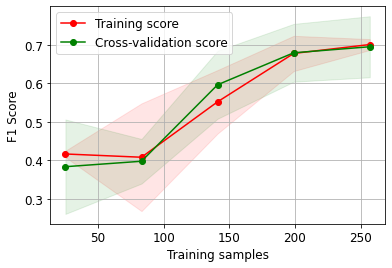

In [5]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=20)
grid_result = grid_search.fit(X_trainval, y_trainval)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print(grid_result.best_estimator_,"\n")
print("Validation Set")
scores1 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='accuracy')
print("Accuracy Scores 5F CV")
print(scores1)
scores1 = pd.Series(scores1)
print("mean:",scores1.mean(), "std:", np.std(scores1))
print("")
print("F1 Scores 5F CV")
scores2 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='f1')
print(scores2)
scores1 = pd.Series(scores2)
print("mean:",scores2.mean(), "std:", np.std(scores2))

print("")
print("Test Set")
grid_result.best_estimator_.fit(X_trainval, y_trainval)
y_pred = grid_result.best_estimator_.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

skplt.estimators.plot_learning_curve(grid_result.best_estimator_, X_trainval, y_trainval,
                                     cv=5, random_state=1, scoring="f1",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large", title=None);
plt.xlabel("Training samples")
plt.ylabel("F1 Score")
ax = plt.gca()
plt.savefig('SVM TVT LC F1.pdf', dpi=300)

In [11]:
line = ax.lines[0]
line.get_data()

(array([ 25,  83, 141, 199, 257]),
 array([0.41684211, 0.40842199, 0.55208243, 0.6773356 , 0.70040663]))

In [12]:
line = ax.lines[1]
line.get_data()

(array([ 25,  83, 141, 199, 257]),
 array([0.38388278, 0.39802009, 0.59619775, 0.679014  , 0.69465779]))

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=5)
grid_result = grid_search.fit(X_trainval, y_trainval)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

print(grid_result.best_estimator_,"\n")
print("Validation Set")
scores1 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='accuracy')
print("Accuracy Scores 5F CV")
print(scores1)
scores1 = pd.Series(scores1)
print("mean:",scores1.mean(), "std:", np.std(scores1))
print("")
print("F1 Scores 5F CV")
scores2 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='f1')
print(scores2)
scores1 = pd.Series(scores2)
print("mean:",scores2.mean(), "std:", np.std(scores2))

print("")
print("Test Set")
grid_result.best_estimator_.fit(X_trainval, y_trainval)
y_pred = grid_result.best_estimator_.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

In [155]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=2)
grid_result = grid_search.fit(X_trainval, y_trainval)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print(grid_result.best_estimator_,"\n")
print("Validation Set")
scores1 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='accuracy')
print("Accuracy Scores 5F CV")
print(scores1)
scores1 = pd.Series(scores1)
print("mean:",scores1.mean(), "std:", np.std(scores1))
print("")
print("F1 Scores 5F CV")
scores2 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='f1')
print(scores2)
scores1 = pd.Series(scores2)
print("mean:",scores2.mean(), "std:", np.std(scores2))

print("")
print("Test Set")
grid_result.best_estimator_.fit(X_trainval, y_trainval)
y_pred = grid_result.best_estimator_.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

Fitting 5 folds for each of 52 candidates, totalling 260 fits
Best: 0.705048 using {'C': 0.3, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.506106 (0.014986) with: {'C': 0.01, 'gamma': 1, 'kernel': 'sigmoid'}
0.503077 (0.003768) with: {'C': 0.01, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.503077 (0.003768) with: {'C': 0.01, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.503077 (0.003768) with: {'C': 0.01, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.612019 (0.063264) with: {'C': 0.05, 'gamma': 1, 'kernel': 'sigmoid'}
0.689519 (0.056025) with: {'C': 0.05, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.503077 (0.003768) with: {'C': 0.05, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.503077 (0.003768) with: {'C': 0.05, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.602740 (0.046524) with: {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}
0.689567 (0.031352) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.503077 (0.003768) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.503077 (0.003768) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoi